## 배송 기간
### 1. 거리와 관계 없이 배송기간이 오버되는 경우
### 2. 물품 부피에 따른 배송기간 연관성

### 거리 계산 (거리 vs 날짜 단순회귀)
- 파일 1. olist_customers_dataset.csv 
    - customer_id
    - customer_zip_code_prefix
    - customer_city
    - customer_state
- 파일 2. olist_geolocation_dataset.csv
    - geolocation_zip_code_prefix : 이걸로 customer_zip_code_prefix랑 연결해야할듯.
    - geolocation_lat : 위도
    - geolocation_lng : 경도 , 두개로 계산
- 파일 3. olist_orders_dataset.csv
    - customer_id
    - order_purchase_timestamp : 구매날짜
    - order_delivered_customer_date : 도착날짜
- 파일 4. olist_order_items_dataset.csv
    - order_id
    - product_id
    - freight_value
- 파일 5. olist_sellers_dataset.csv
    - seller_id
    - seller_zip_code_prefix
### 부피
- 파일 4. olist_products_dataset.csv
    - product_id
    - product_length_cm
    - product_height_cm
    - product_width_cm

In [1]:
import pandas as pd
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [2]:
orders = pd.read_csv("datasets/olist_orders_dataset.csv")

items = pd.read_csv("datasets/olist_order_items_dataset.csv")

customers = pd.read_csv("datasets/olist_customers_dataset.csv")

sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")

geo = pd.read_csv("datasets/olist_geolocation_dataset.csv")

products = pd.read_csv("datasets/olist_products_dataset.csv")

In [3]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
df = items[['order_id', 'seller_id', 'product_id']]
df_1 = df.merge(sellers[['seller_id', 'seller_zip_code_prefix']], on='seller_id', how='outer')
df_1.head()

,order_id,seller_id,product_id,seller_zip_code_prefix
0,7f39ba4c9052be115350065d07583cac,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,9080
1,9dc8d1a6f16f1b89874c29c9d8d30447,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,9080
2,d455a8cb295653b55abda06d434ab492,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,9080
3,006e43460a55bc60c0a437521e426529,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,29156
4,00dfb074b5c910fbd08e04691c4b712f,001cca7ae9ae17fb1caed9dfb1094831,4f3b83b83f7fb280fca4f90ba502f50e,29156


In [5]:
orders = orders.merge(df_1, on='order_id', how='left')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,seller_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,9350.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,31570.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,14840.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,31842.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,8752.0


In [6]:
orders = orders.merge(customers[['customer_id', 'customer_zip_code_prefix']],
                      on='customer_id', how='left')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,seller_zip_code_prefix,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,9350.0,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,31570.0,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,14840.0,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,31842.0,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,8752.0,9195


In [7]:
geo = geo[~geo['geolocation_zip_code_prefix'].duplicated()]
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


In [8]:
orders = orders.merge(geo,
                      left_on = 'seller_zip_code_prefix',
                      right_on = 'geolocation_zip_code_prefix',
                      how = 'left')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,9350.0,3149,9350.0,-23.680114,-46.452454,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,31570.0,47813,31570.0,-19.810119,-43.984727,belo horizonte,MG
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,14840.0,75265,14840.0,-21.362358,-48.232976,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,31842.0,59296,31842.0,-19.840168,-43.923299,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,8752.0,9195,8752.0,-23.551707,-46.260979,mogi das cruzes,SP


In [9]:
orders = orders.merge(geo,
                      left_on = 'customer_zip_code_prefix',
                      right_on = 'geolocation_zip_code_prefix',
                      how = 'left',
                      suffixes = ('_seller', '_customer'))
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,...,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,-19.810119,-43.984727,belo horizonte,MG,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,...,14840.0,-21.362358,-48.232976,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,...,31842.0,-19.840168,-43.923299,belo horizonte,MG,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,...,8752.0,-23.551707,-46.260979,mogi das cruzes,SP,9195.0,-23.675037,-46.524784,santo andre,SP


In [10]:
orders = orders.dropna()

In [11]:
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lng1, lat1, lng2, lat2):
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 +cos(lat1) * cos(lat2) * sin(dlng / 2) ** 2
    return 2 *6371 * asin(sqrt(a))

orders['distance'] = orders.apply(
        lambda row: haversine_distance(
            row['geolocation_lng_seller'],
            row['geolocation_lat_seller'],
            row['geolocation_lng_customer'],
            row['geolocation_lat_customer'],
        ),
            axis=1,)

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,product_id,...,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,...,-19.810119,-43.984727,belo horizonte,MG,47813.0,-12.169860,-44.988369,barreiras,BA,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,...,-21.362358,-48.232976,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,...,-19.840168,-43.923299,belo horizonte,MG,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,...,-23.551707,-46.260979,mogi das cruzes,SP,9195.0,-23.675037,-46.524784,santo andre,SP,30.174037


In [12]:
df = orders[['customer_id',
             'order_id',
             'product_id',
             'order_status', 
             'order_purchase_timestamp', 
             'order_delivered_customer_date',
             'distance']]
df.head()

,customer_id,order_id,product_id,order_status,order_purchase_timestamp,order_delivered_customer_date,distance
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,18.063837
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,856.292580
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,514.130333
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1822.800366
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,30.174037


In [13]:
df.shape

(109644, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109644 entries, 0 to 113424
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109644 non-null  object 
 1   order_id                       109644 non-null  object 
 2   product_id                     109644 non-null  object 
 3   order_status                   109644 non-null  object 
 4   order_purchase_timestamp       109644 non-null  object 
 5   order_delivered_customer_date  109644 non-null  object 
 6   distance                       109644 non-null  float64
dtypes: float64(1), object(6)
memory usage: 6.7+ MB


In [15]:
df['order_status'].value_counts()

order_status
delivered    109637
canceled          7
Name: count, dtype: int64

In [16]:
df[df['order_status'] == 'canceled']

,customer_id,order_id,product_id,order_status,order_purchase_timestamp,order_delivered_customer_date,distance
3284,1bccb206de9f0f25adc6871a1bcf77b2,1950d777989f6a877539f53795b4c3c3,e435ceb7ced9b8446defd858630454ed,canceled,2018-02-19 19:48:52,2018-03-21 22:03:51,486.390697
9963,5cdec0bb8cbdf53ffc8fdc212cd247c6,dabf2b0e35b423f94618bf965fcb7514,473795a355d29305c3ea6b156833adf5,canceled,2016-10-09 00:56:52,2016-10-16 14:36:59,382.020297
9964,5cdec0bb8cbdf53ffc8fdc212cd247c6,dabf2b0e35b423f94618bf965fcb7514,7cd29da0653abeb444703cc5a957f479,canceled,2016-10-09 00:56:52,2016-10-16 14:36:59,382.020297
66373,6c57e6119369185e575b36712766b0ef,770d331c84e5b214bd9dc70a10b829d0,eba7488e1c67729f045ab43fac426f2e,canceled,2016-10-07 14:52:30,2016-10-14 15:07:11,39.140047
67569,bf609b5741f71697f65ce3852c5d2623,8beb59392e21af5eb9547ae1a9938d06,c66def7098f4d87751f40c3a4855ced1,canceled,2016-10-08 20:17:50,2016-10-19 18:47:43,3.504955
105596,70fc57eeae292675927697fe03ad3ff5,65d1e226dfaeb8cdc42f665422522d14,9c7bdf67b06b419aefb93cfdfc96c55d,canceled,2016-10-03 21:01:41,2016-11-08 10:58:34,358.480250
107662,de4caa97afa80c8eeac2ff4c8da5b72e,2c45c33d2f9cb8ff8b1c86cc28c11c30,e24f73b7631ee3fbb2ab700a9acaa258,canceled,2016-10-09 15:39:56,2016-11-09 14:53:50,714.280322


In [17]:
idx = df[df['order_status'] == 'canceled'].index
df = df.drop(idx)
df.shape

(109637, 7)

In [18]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [19]:
df['deliver_period'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['deliver_period'].head()

0     8
1    13
2     9
3    13
4     2
Name: deliver_period, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['distance']].values  # 독립 변수 (거리)
y = df['deliver_period'].values  # 종속 변수 (주문 처리 시간)

model = LinearRegression()

model.fit(X, y)

print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

회귀 계수: [0.00629537]
절편: 8.24317531833466


In [21]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X)
y_true = y

mse = mean_squared_error(y_true, y_pred)
print("평균 제곱 오차(MSE):", mse)

평균 제곱 오차(MSE): 75.48350226340852


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


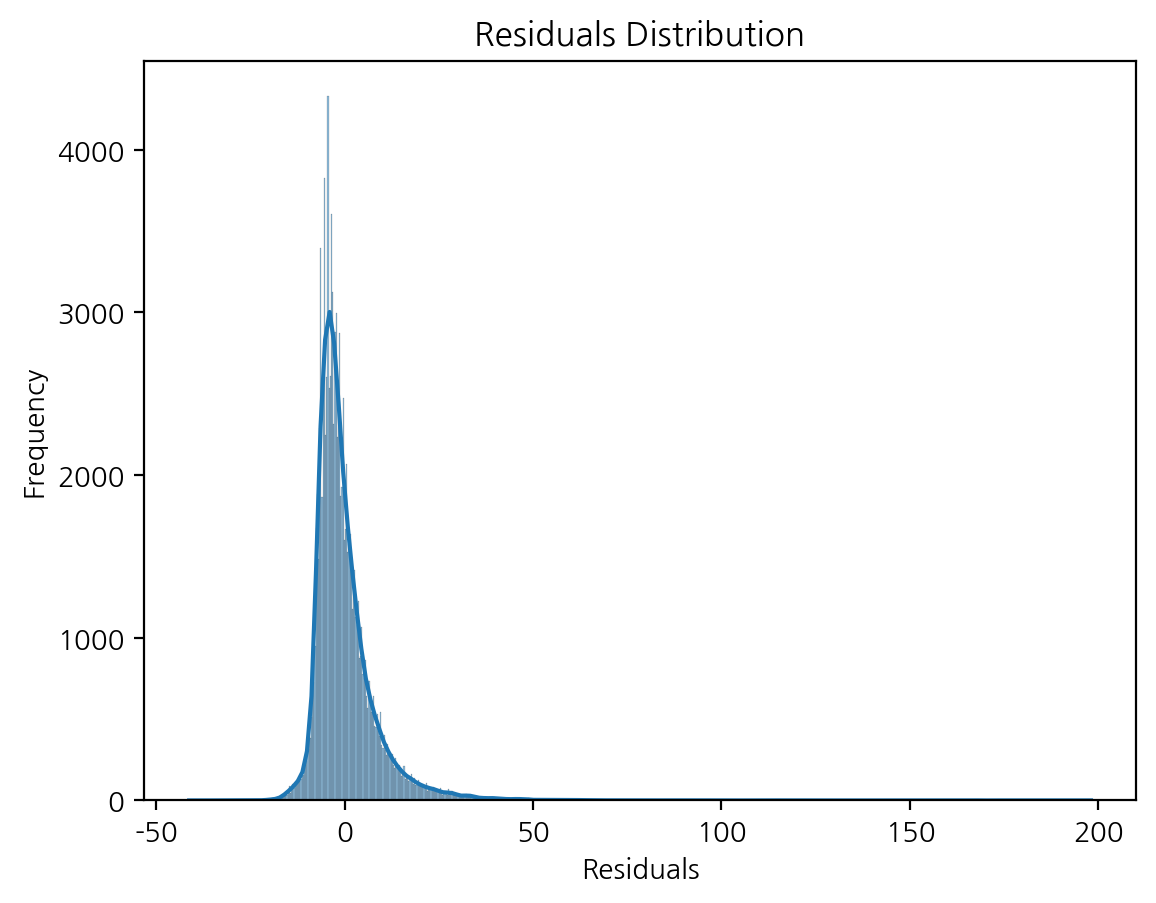

In [22]:
residuals = y_true - y_pred

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## 이상치 제거

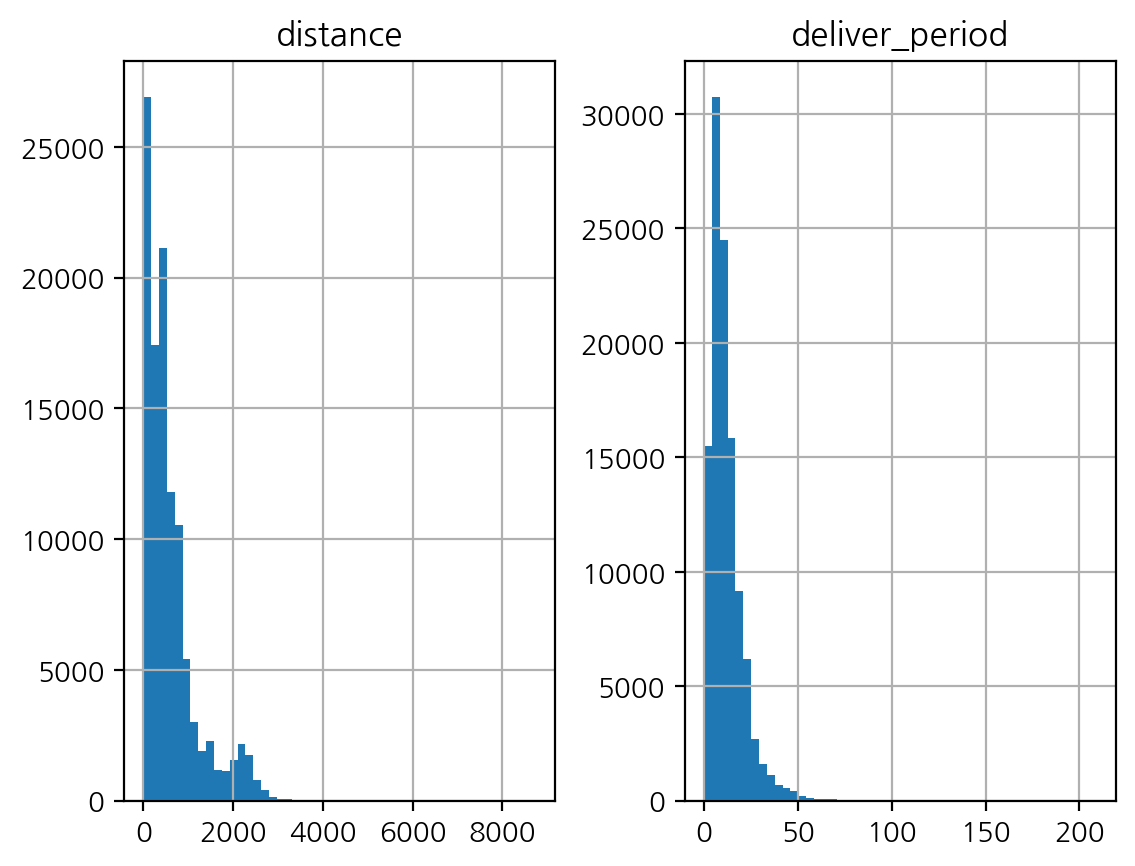

In [23]:
df[['distance','deliver_period']].hist(bins=50);

In [24]:
df[['distance','deliver_period']].describe()

,distance,deliver_period
count,109637.000000,109637.000000
mean,596.510864,11.998431
std,590.353005,9.449682
min,0.000000,0.000000
25%,184.296023,6.000000
50%,432.110470,10.000000
75%,791.500276,15.000000
max,8736.947618,209.000000


In [25]:
df_log = np.log1p(df[['distance','deliver_period']])
df_log.describe()

,distance,deliver_period
count,109637.000000,109637.000000
mean,5.770421,2.363584
std,1.367303,0.636986
min,0.000000,0.000000
25%,5.221955,1.945910
50%,6.070993,2.397895
75%,6.675193,2.772589
max,9.075431,5.347108


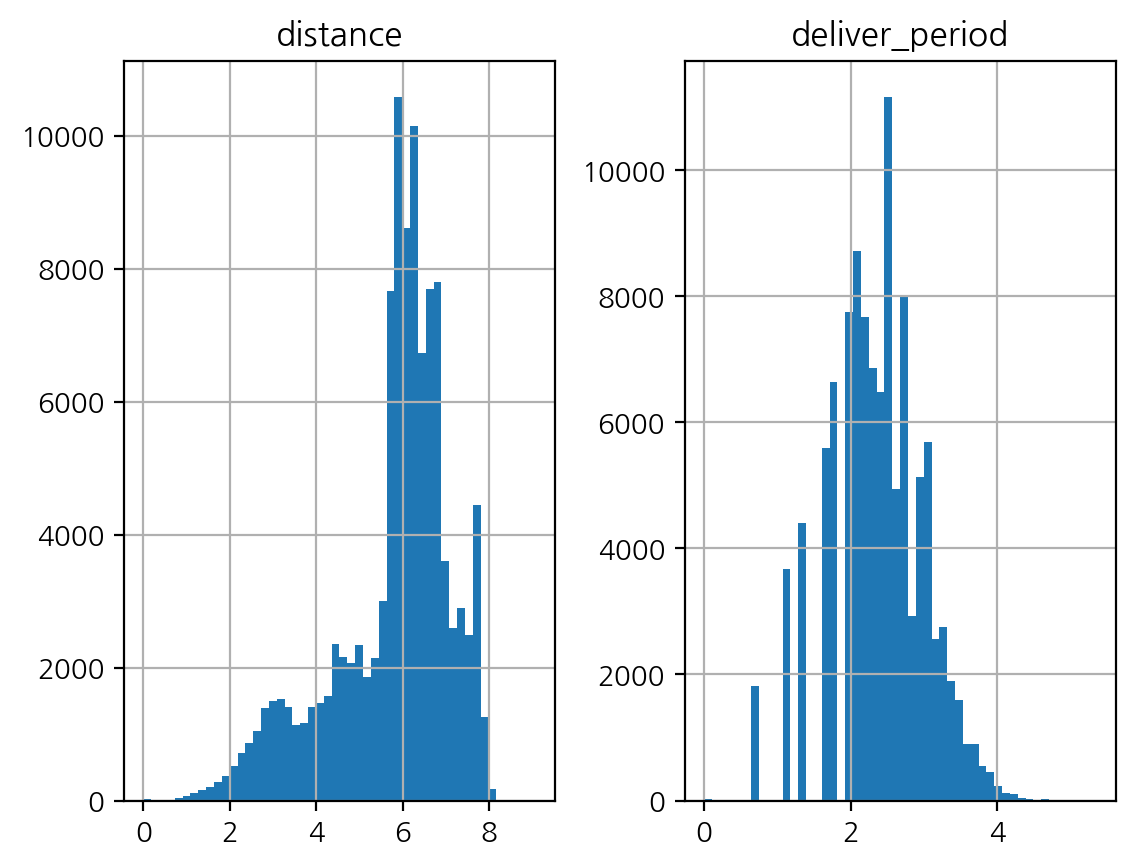

In [26]:
df_log.hist(bins=50);

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_log[['distance']].values  # 독립 변수 (거리)
y = df_log['deliver_period'].values  # 종속 변수 (주문 처리 시간)

model = LinearRegression()

model.fit(X, y)

print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

회귀 계수: [0.25610411]
절편: 0.8857550490875317


In [28]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X)
y_true = y

mse = mean_squared_error(y_true, y_pred)
print("평균 제곱 오차(MSE):", mse)

평균 제곱 오차(MSE): 0.28312813876209875


C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


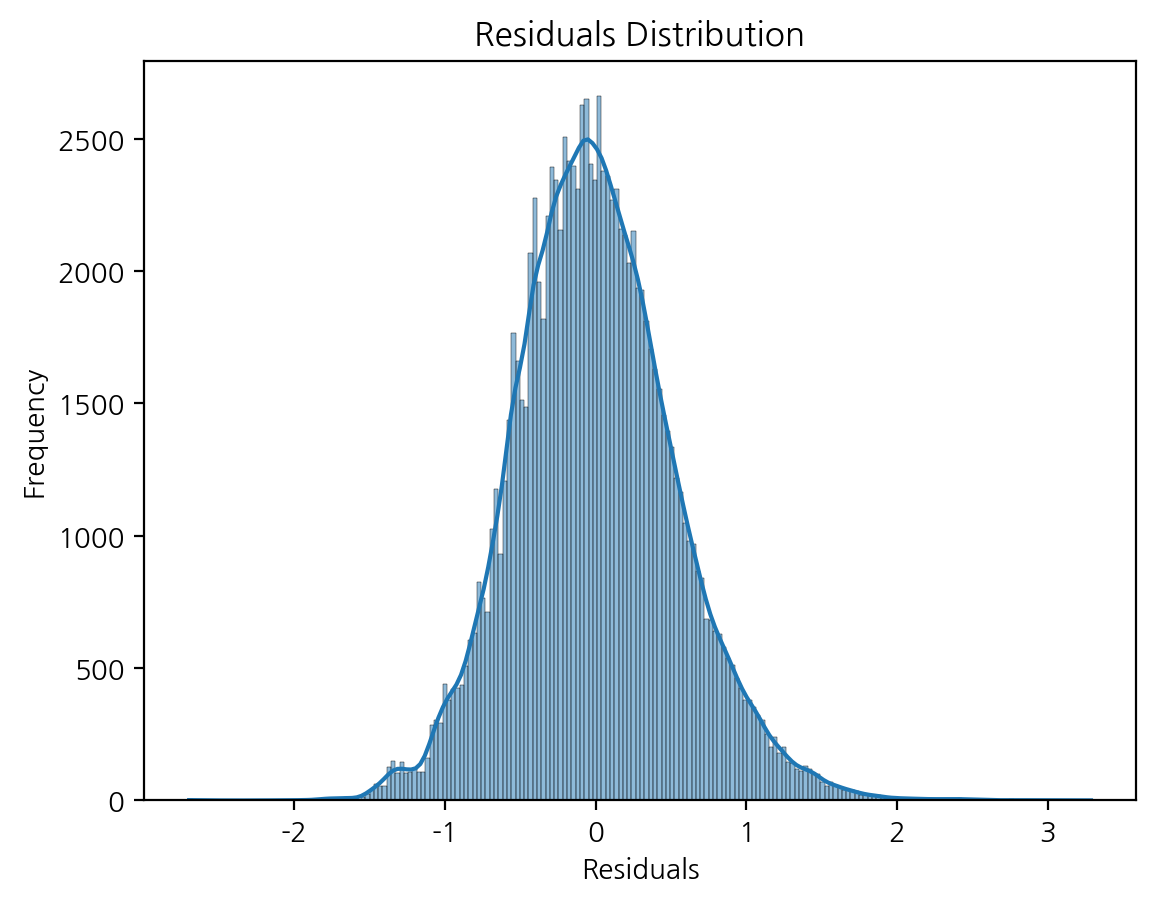

In [29]:
residuals = y_true - y_pred

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

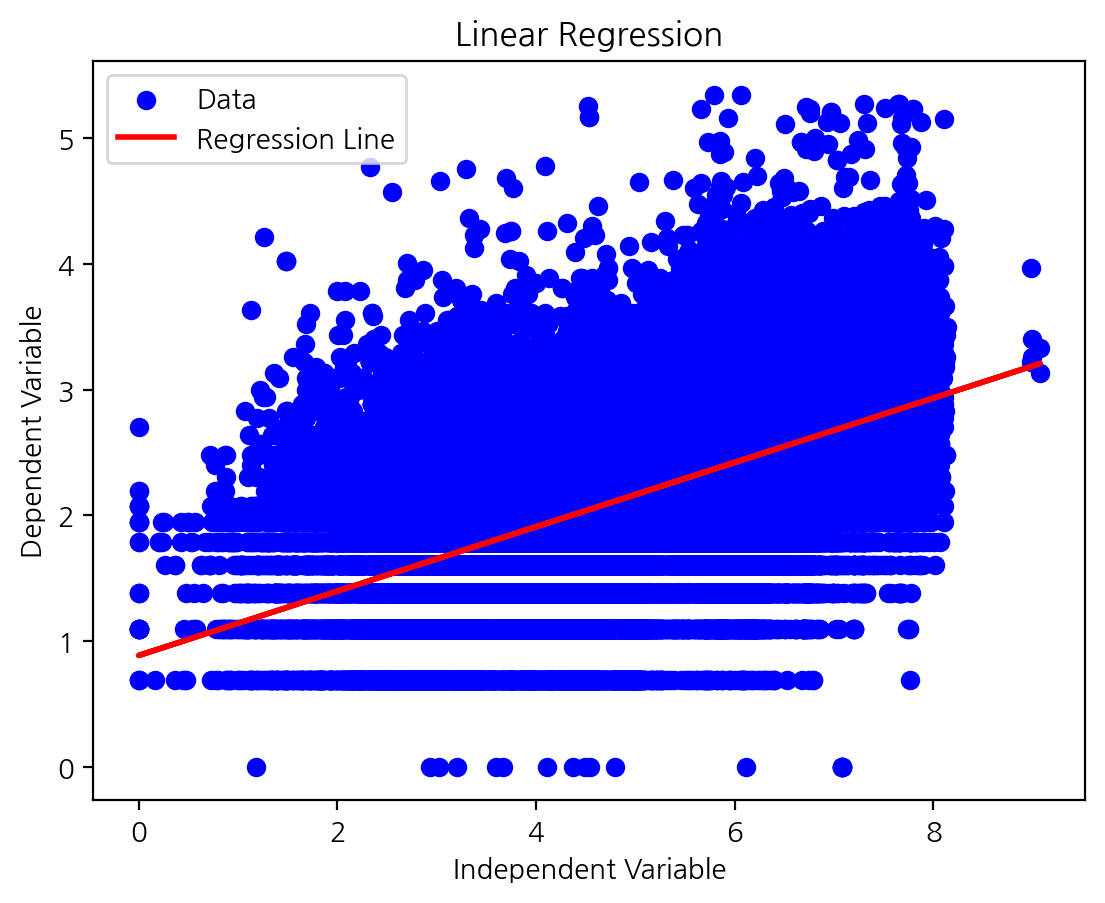

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data')

plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')


plt.legend()

plt.show()

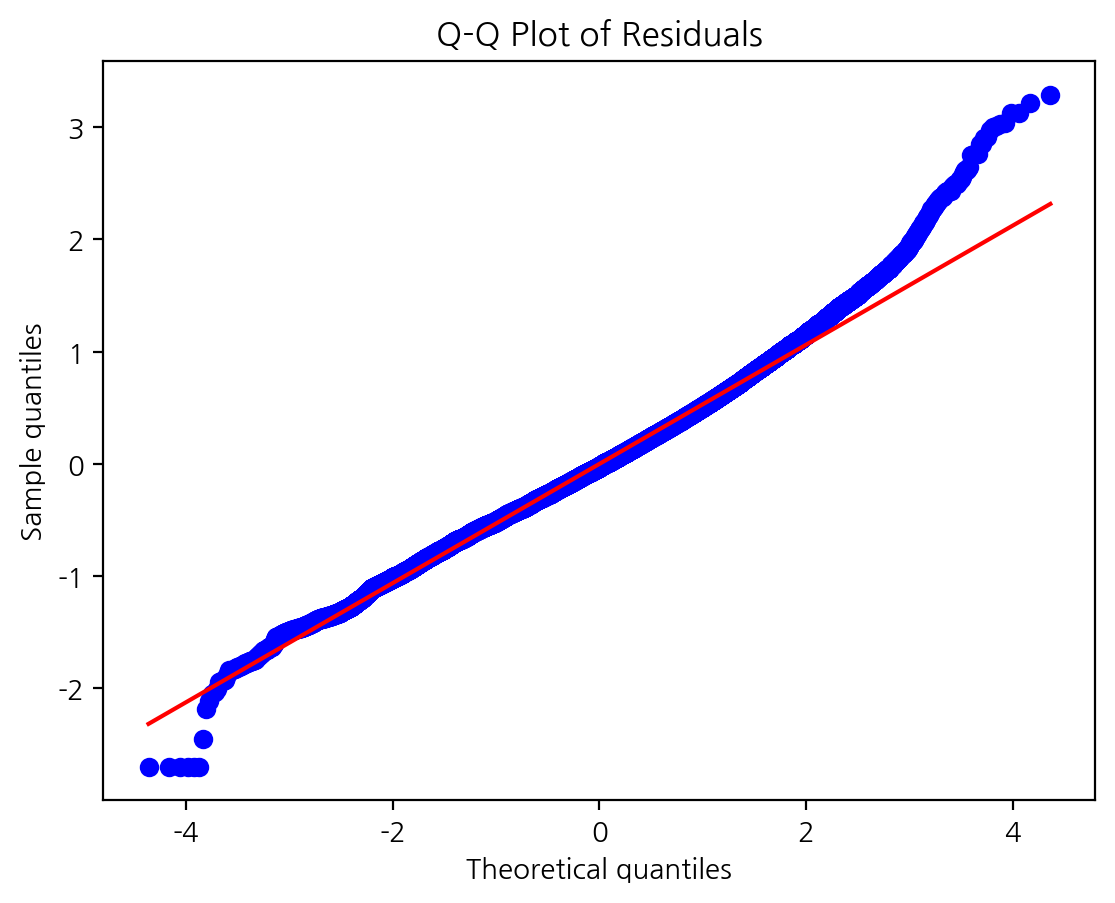

In [31]:
import scipy.stats as stats

# Q-Q plot 그리기
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

## 2. 다중회귀분석
- 독립변수1 : 평점
- 독립변수2 : 거리
- 독립변수3 : 물품부피
    <br></br>
- 종속변수 : 배송기간

In [32]:
df.head()

,customer_id,order_id,product_id,order_status,order_purchase_timestamp,order_delivered_customer_date,distance,deliver_period
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,18.063837,8
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,856.292580,13
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,514.130333,9
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1822.800366,13
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,30.174037,2


In [33]:
reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv')

In [34]:
df1 = pd.merge(df, reviews, on='order_id')
df1.shape

(109445, 14)

In [35]:
df1.head()

,customer_id,order_id,product_id,order_status,order_purchase_timestamp,order_delivered_customer_date,distance,deliver_period,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,18.063837,8,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,856.292580,13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,514.130333,9,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1822.800366,13,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,30.174037,2,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [36]:
df2 = pd.merge(df1, products, on='product_id')
df2.shape

(109445, 22)

In [37]:
df2.head()

,customer_id,order_id,product_id,order_status,order_purchase_timestamp,order_delivered_customer_date,distance,deliver_period,review_id,review_score,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,18.063837,8,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,856.292580,13,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,514.130333,9,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1822.800366,13,359d03e676b3c069f62cadba8dd3f6e8,5,...,2017-12-03 00:00:00,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,30.174037,2,e50934924e227544ba8246aeb3770dd4,5,...,2018-02-17 00:00:00,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [38]:
df2.columns

Index(['customer_id', 'order_id', 'product_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_customer_date', 'distance',
       'deliver_period', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [39]:
df = df2[['distance', 
          'review_score', 
          'product_length_cm', 'product_height_cm', 'product_width_cm',
          'deliver_period']]
df.head()

,distance,review_score,product_length_cm,product_height_cm,product_width_cm,deliver_period
0,18.063837,4,19.0,8.0,13.0,8
1,856.292580,4,19.0,13.0,19.0,13
2,514.130333,5,24.0,19.0,21.0,9
3,1822.800366,5,30.0,10.0,20.0,13
4,30.174037,5,51.0,15.0,15.0,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109445 entries, 0 to 109444
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   distance           109445 non-null  float64
 1   review_score       109445 non-null  int64  
 2   product_length_cm  109427 non-null  float64
 3   product_height_cm  109427 non-null  float64
 4   product_width_cm   109427 non-null  float64
 5   deliver_period     109445 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 5.0 MB


In [41]:
df[df['product_length_cm'].isnull()]

,distance,review_score,product_length_cm,product_height_cm,product_width_cm,deliver_period
8093,1055.539044,5,NaN,NaN,NaN,13
8531,919.667711,5,NaN,NaN,NaN,9
8532,919.667711,5,NaN,NaN,NaN,9
20834,835.412137,5,NaN,NaN,NaN,11
31008,872.632238,5,NaN,NaN,NaN,16
34966,310.449651,1,NaN,NaN,NaN,8
39348,560.017401,5,NaN,NaN,NaN,26
39349,560.017401,5,NaN,NaN,NaN,26
42186,749.766216,5,NaN,NaN,NaN,8
45325,272.928962,5,NaN,NaN,NaN,10


In [42]:
idx = df[df['product_length_cm'].isnull()].index
df.drop(idx, inplace=True)
df.shape

C:\Users\hmins\AppData\Local\Temp\ipykernel_17988\714800713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(idx, inplace=True)


(109427, 6)

In [43]:
df.head()

,distance,review_score,product_length_cm,product_height_cm,product_width_cm,deliver_period
0,18.063837,4,19.0,8.0,13.0,8
1,856.292580,4,19.0,13.0,19.0,13
2,514.130333,5,24.0,19.0,21.0,9
3,1822.800366,5,30.0,10.0,20.0,13
4,30.174037,5,51.0,15.0,15.0,2


In [44]:
df['product_volume'] = (df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm'])
df['product_volume'].head()

C:\Users\hmins\AppData\Local\Temp\ipykernel_17988\1701266994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_volume'] = (df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm'])


0     1976.0
1     4693.0
2     9576.0
3     6000.0
4    11475.0
Name: product_volume, dtype: float64

In [45]:
df = df[['distance', 'review_score', 'product_volume', 'deliver_period']]
df.head()

,distance,review_score,product_volume,deliver_period
0,18.063837,4,1976.0,8
1,856.292580,4,4693.0,13
2,514.130333,5,9576.0,9
3,1822.800366,5,6000.0,13
4,30.174037,5,11475.0,2


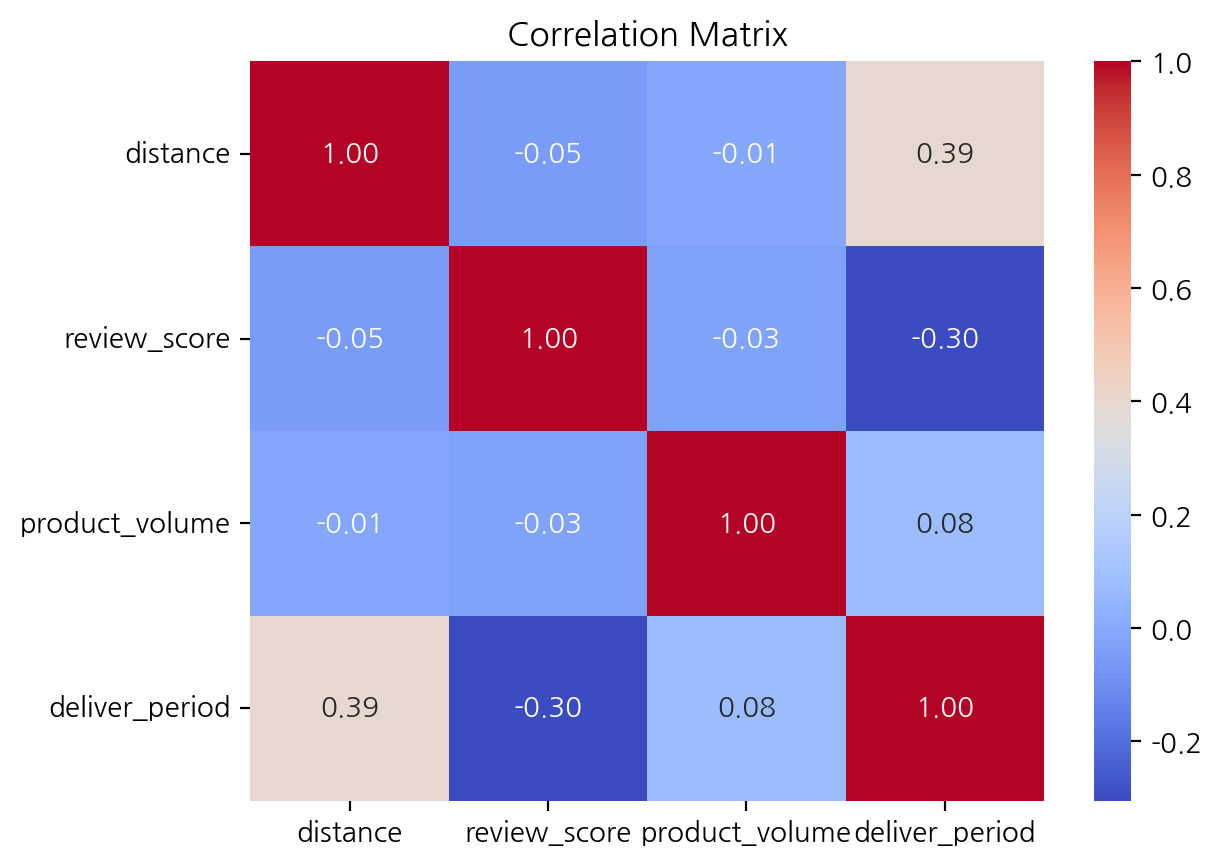

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- 거리가 늘어날 수록 배송기간이 늘어나는 것 당연함
- 리뷰 스코어가 오를수록 배송이 작아지는 음의 상관계수
- 제품 부피는 배송기간과 별 차이 없는 것 같지만 확인해봐야겠음

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

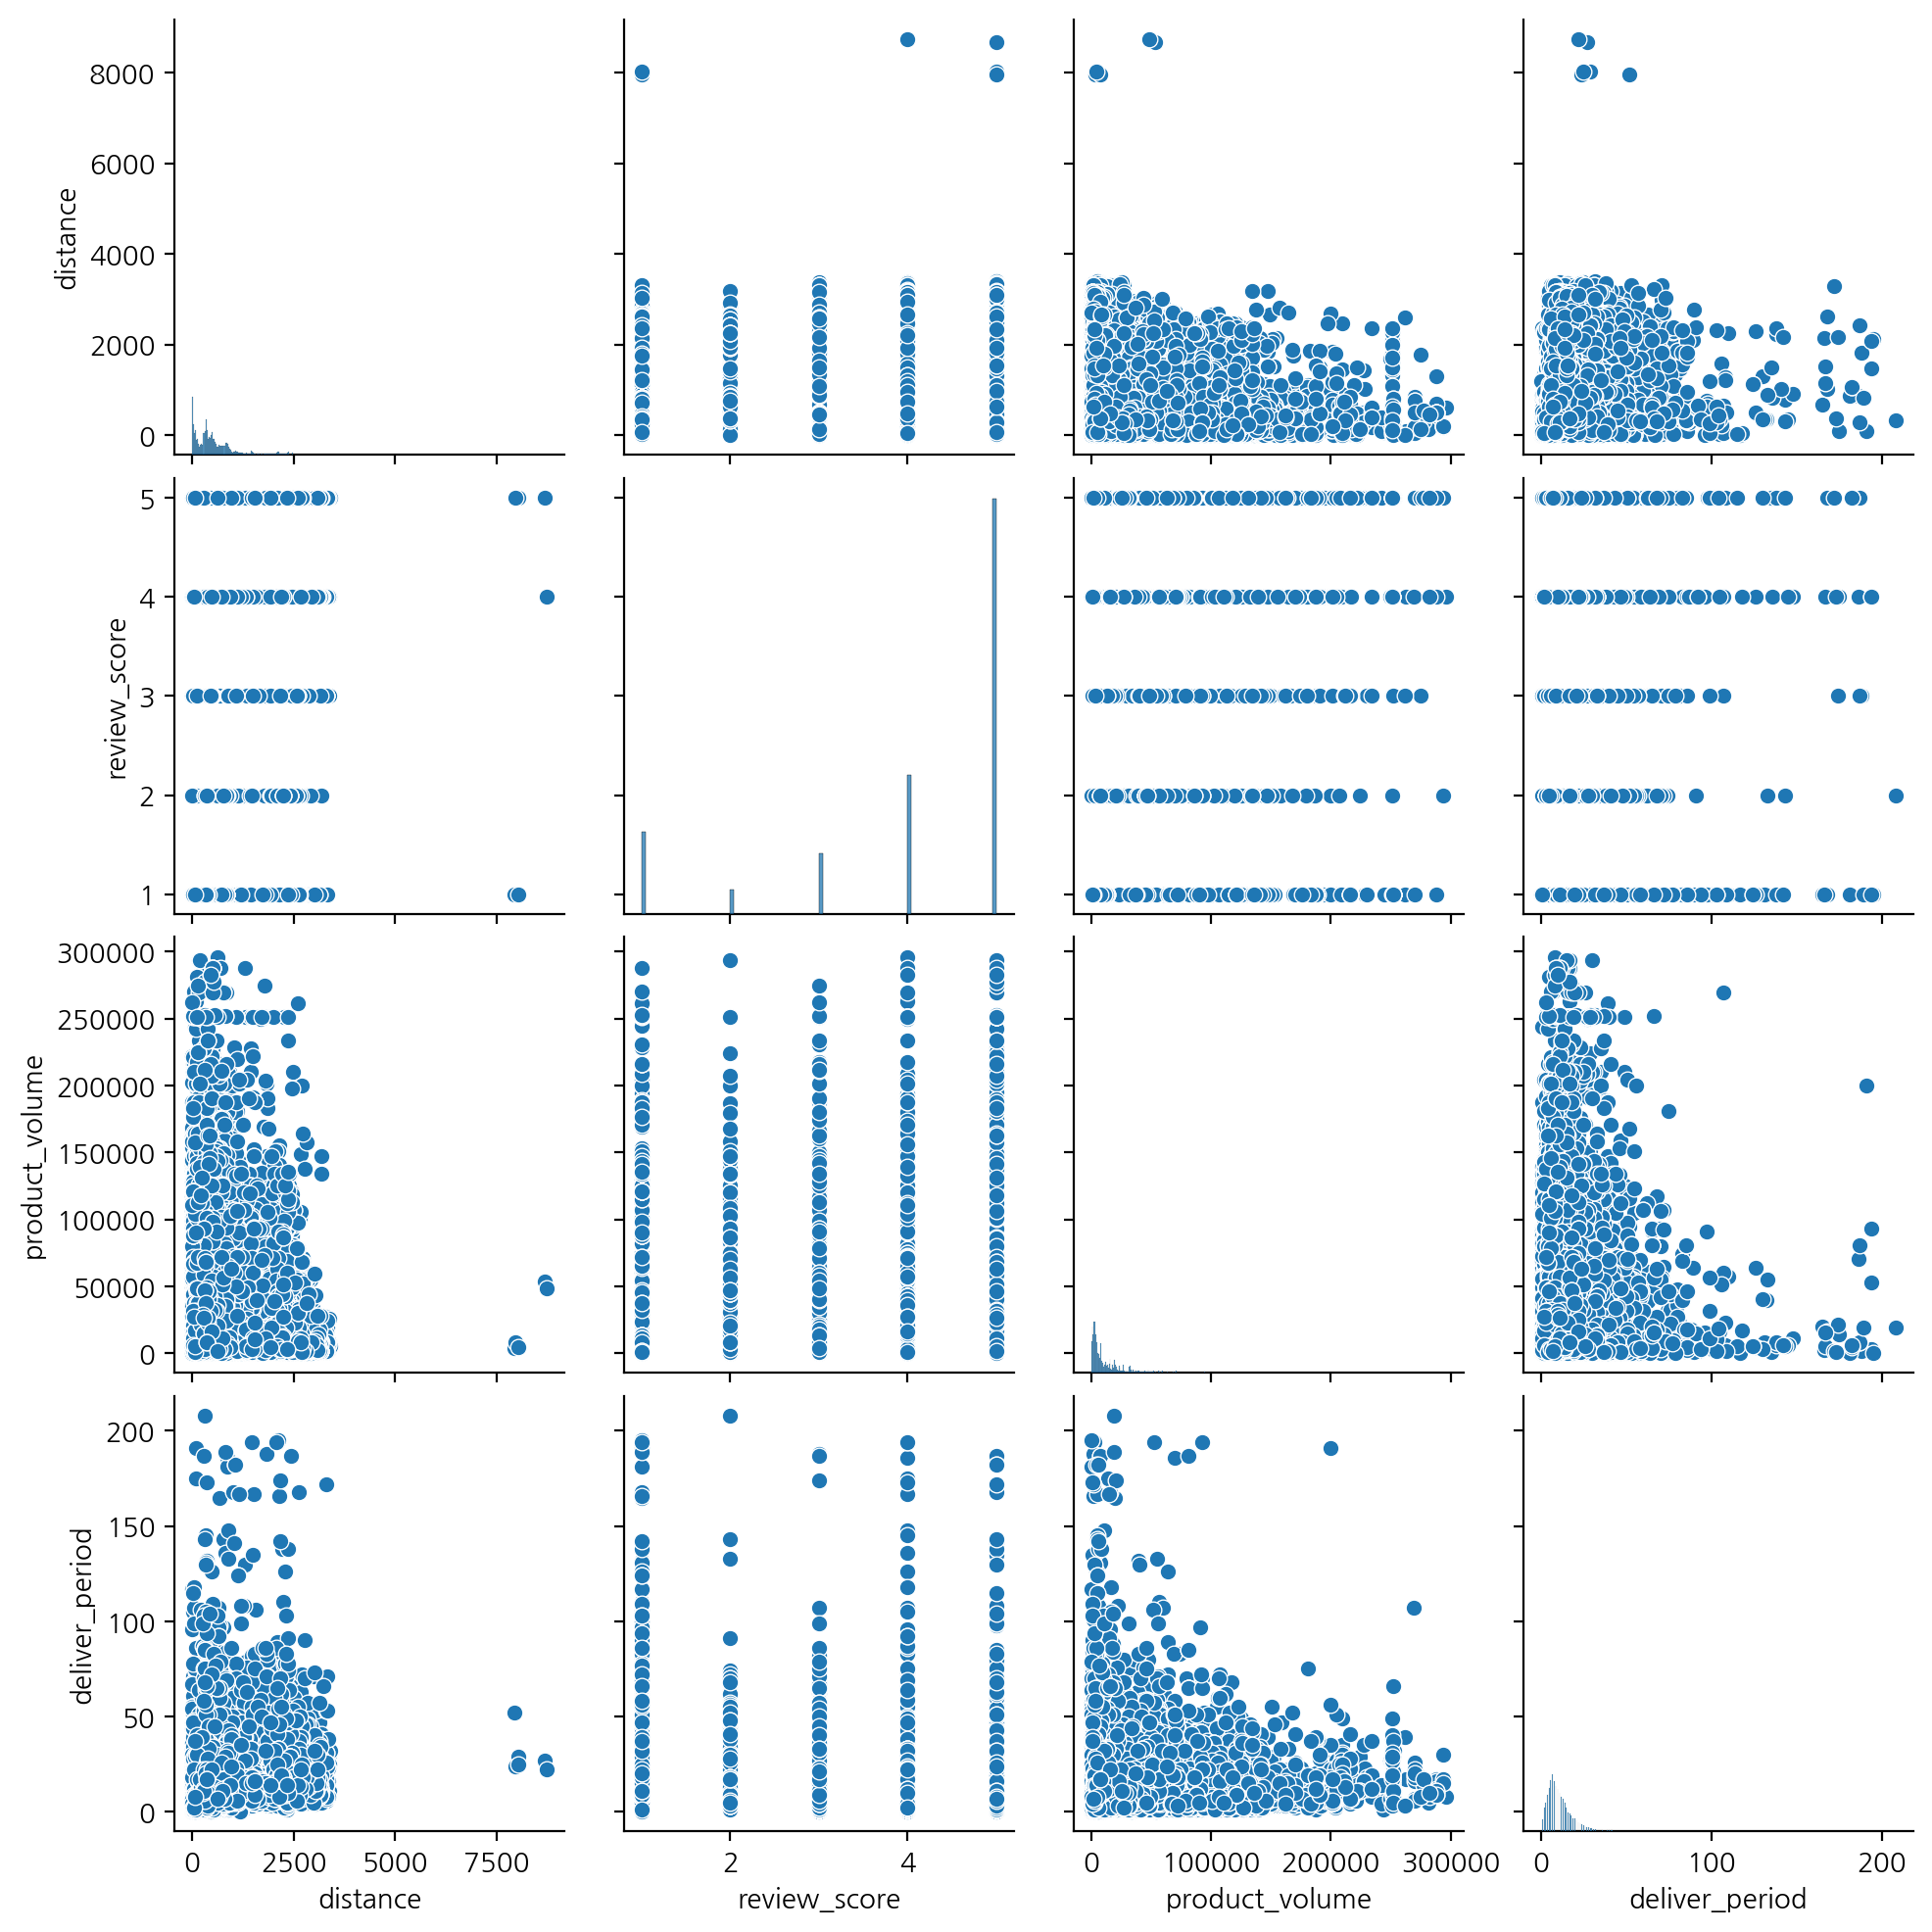

In [47]:
sns.pairplot(df)
plt.show()

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

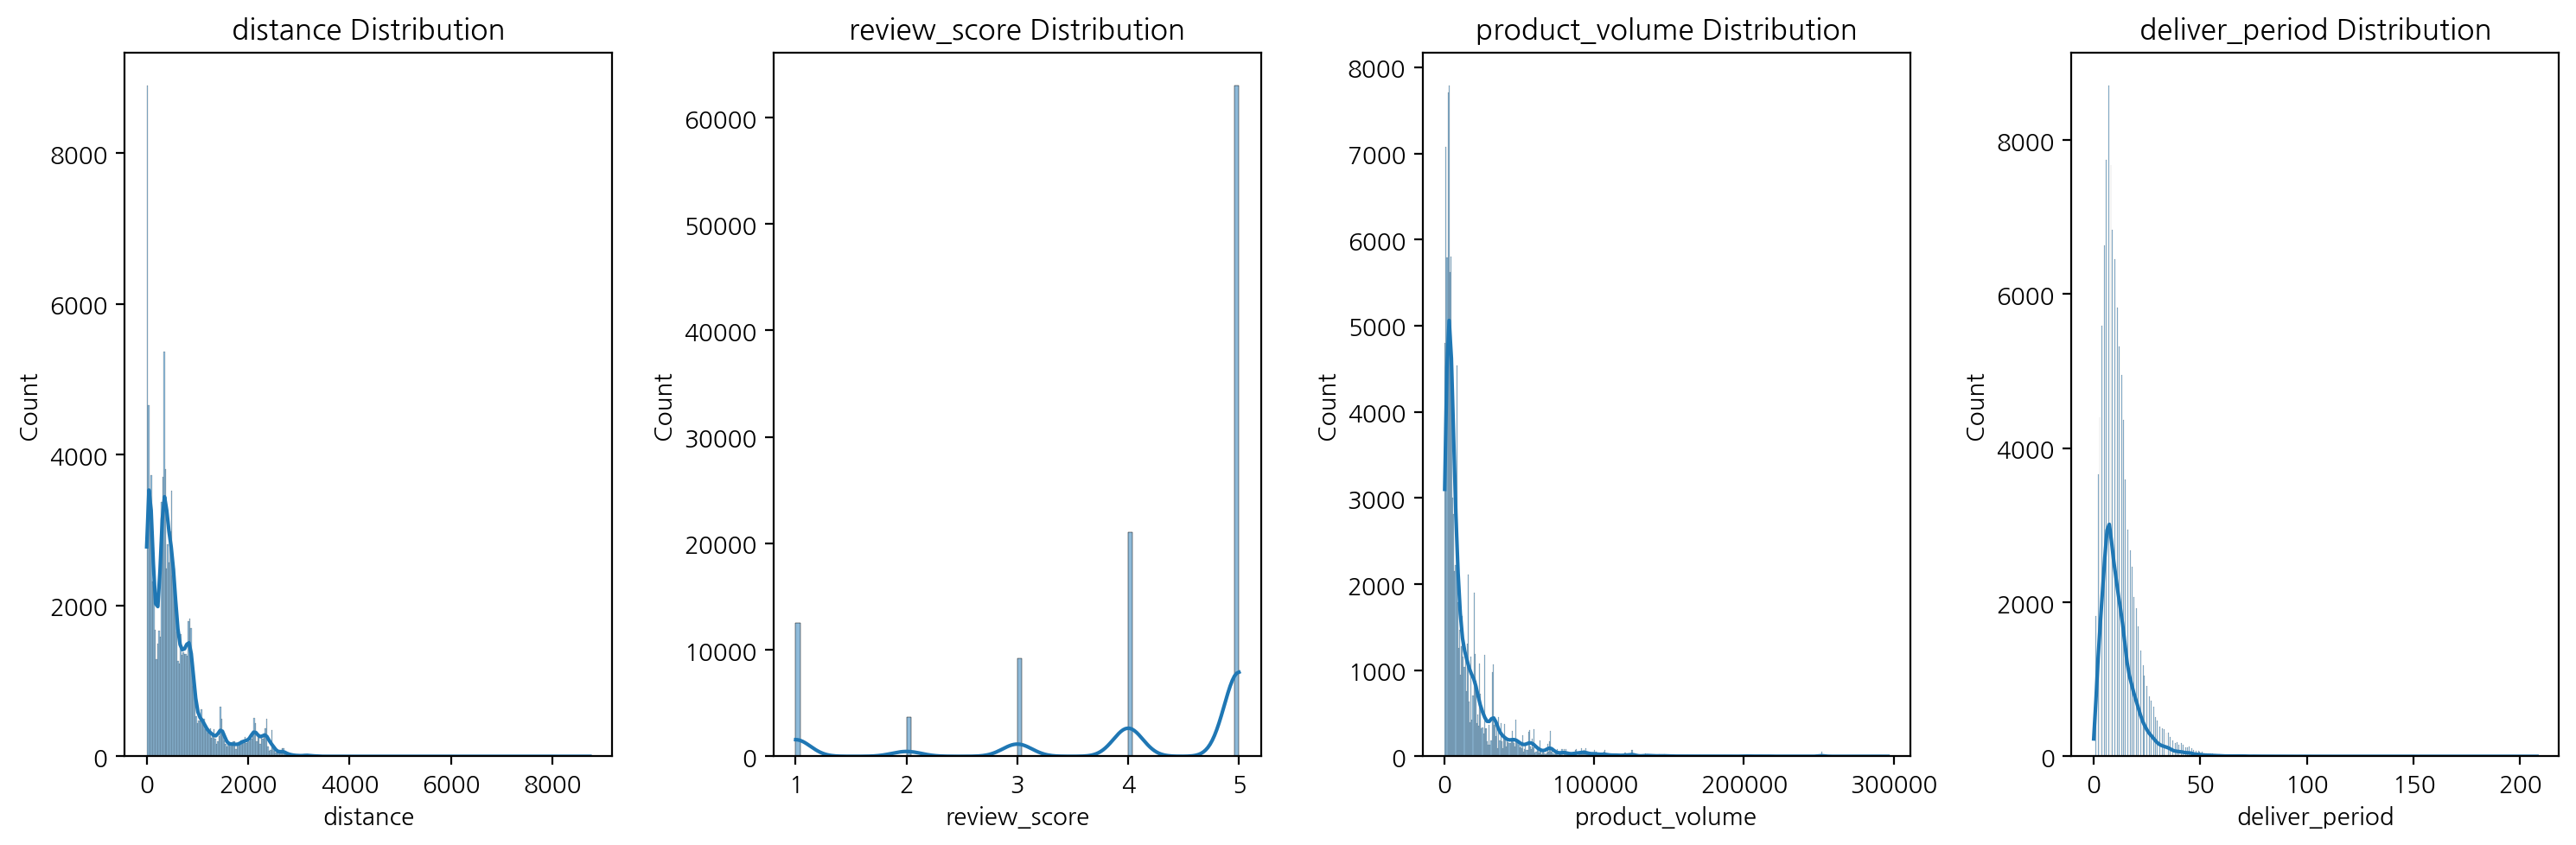

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, col in enumerate(['distance', 'review_score', 'product_volume', 'deliver_period']):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

## 로그 변환 전에 이상치 제거 먼저

In [49]:
def detect_outliers(df, cols):
    outliers = []
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return list(set(outliers))

In [50]:
outliers = detect_outliers(df, ['distance', 'review_score', 'product_volume', 'deliver_period'])

In [51]:
df_cleaned = df.drop(outliers)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 종속 변수와 독립 변수를 나눕니다.
X = df_cleaned[['distance', 'review_score', 'product_volume']]
y = df_cleaned['deliver_period']

# 학습용과 테스트용 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중회귀분석 모델을 만들고 학습합니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)

평균 제곱 오차(MSE): 23.64624272739113


- 로그변환 세개다 필요할 것 같음.

In [53]:
df_cleaned['log_distance'] = np.log1p(df['distance'])
df_cleaned['log_review'] = np.log1p(df['review_score'])
df_cleaned['log_product_volume'] = np.log1p(df['product_volume'])

df_cleaned.head()

,distance,review_score,product_volume,deliver_period,log_distance,log_review,log_product_volume
0,18.063837,4,1976.0,8,2.947793,1.609438,7.589336
1,856.292580,4,4693.0,13,6.753779,1.609438,8.454040
2,514.130333,5,9576.0,9,6.244420,1.791759,9.167120
4,30.174037,5,11475.0,2,3.439586,1.791759,9.348013
6,321.730402,5,4352.0,9,5.776817,1.791759,8.378621


In [54]:
df_cleaned.shape

(77695, 7)

C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hmins\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


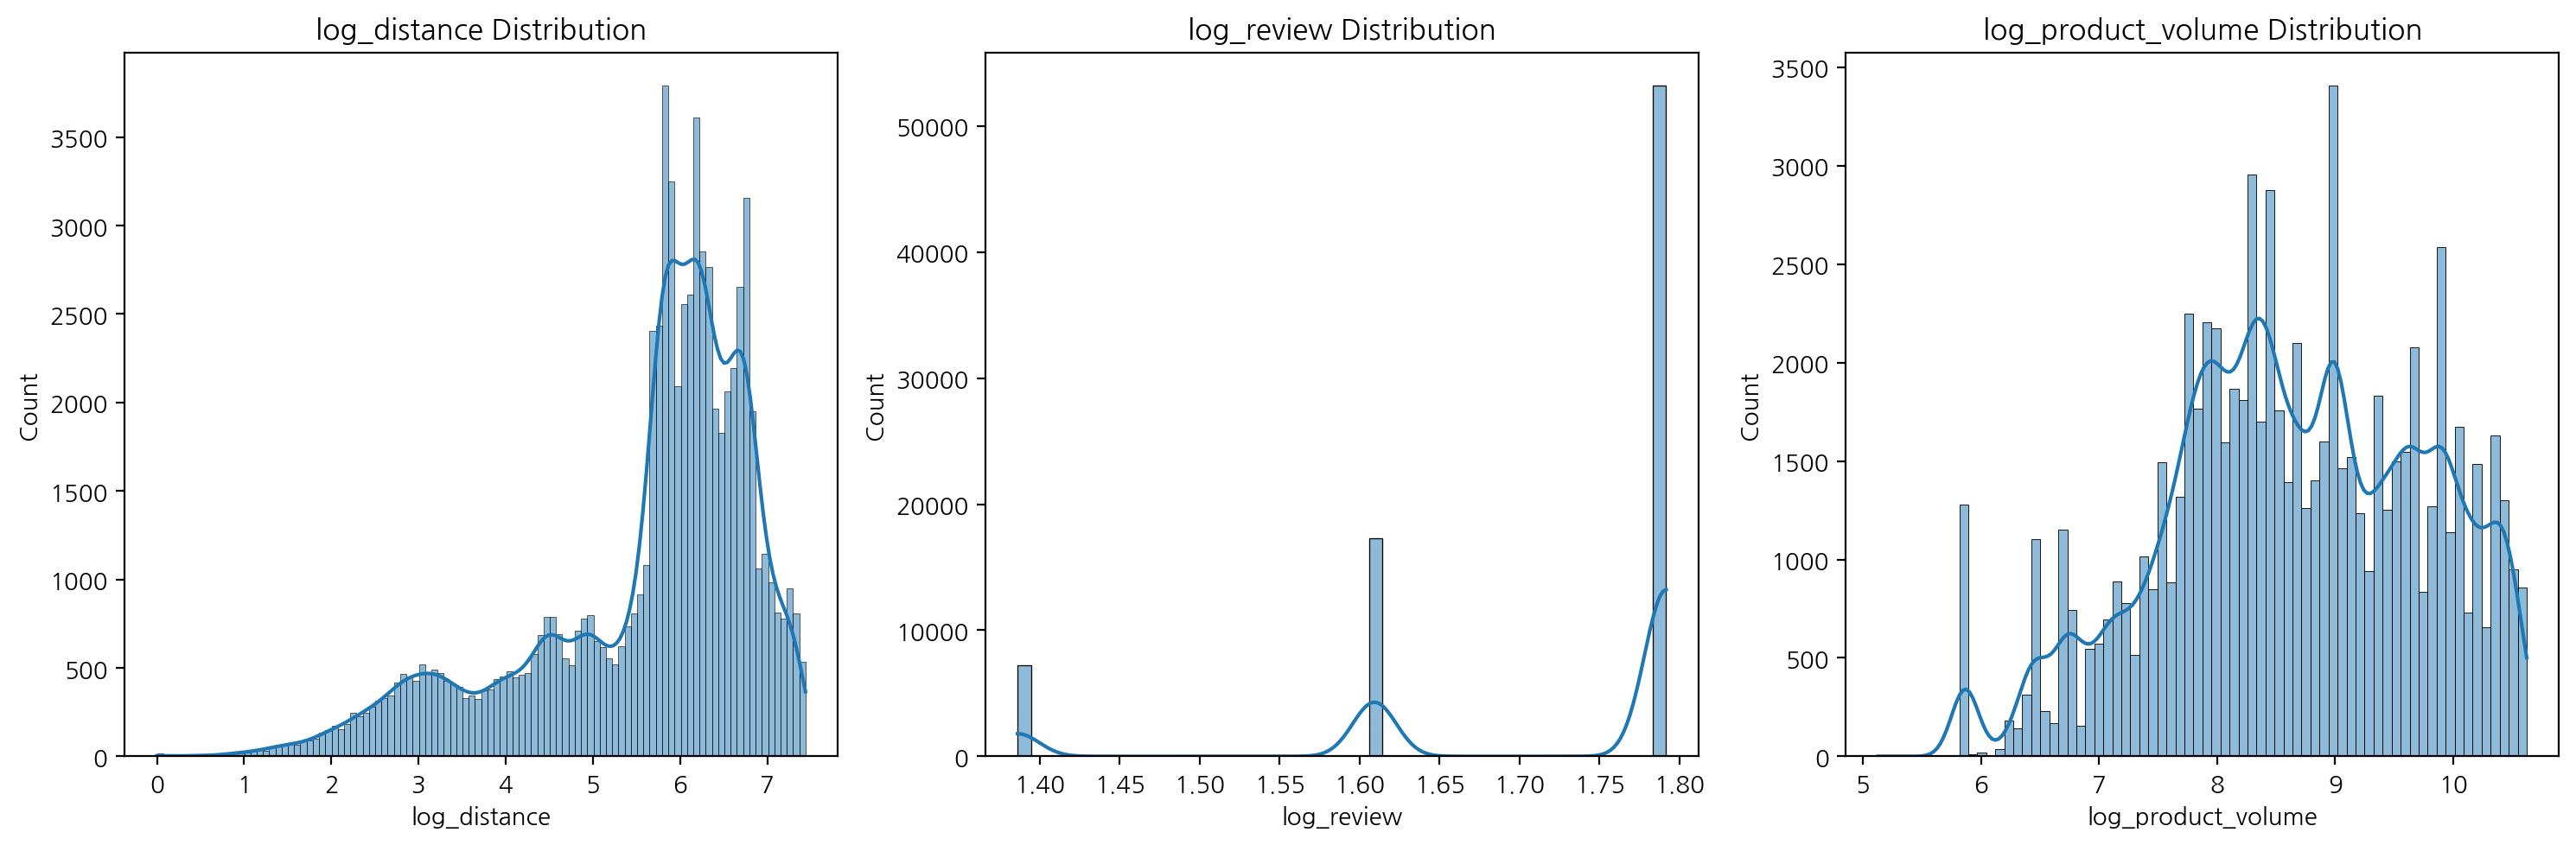

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['log_distance', 'log_review', 'log_product_volume']):
    sns.histplot(df_cleaned[col], ax=axes[i], kde=True)
    axes[i].set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

- 리뷰는 로그변환 하지 않아도 될듯( 이상치 제거 또한 안해도될듯.)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 종속 변수와 독립 변수를 나눕니다.
X = df_cleaned[['log_distance', 'review_score', 'log_product_volume']]
y = df_cleaned['deliver_period']

# 학습용과 테스트용 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 세트를 다시 훈련 세트와 검증 세트로 나눔
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 다중회귀분석 모델을 만들고 학습합니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)

평균 제곱 오차(MSE): 23.39192012536429


In [57]:
df_cleaned['log_deliver_period'] = np.log1p(df_cleaned['deliver_period'])

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 종속 변수와 독립 변수를 나눕니다.
X = df_cleaned[['log_distance', 'review_score', 'log_product_volume']]
y = df_cleaned['log_deliver_period']

# 학습용과 테스트용 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중회귀분석 모델을 만들고 학습합니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터를 사용하여 예측을 수행합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 평가합니다.
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)

평균 제곱 오차(MSE): 0.21161366571478324


In [59]:
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

회귀 계수: [ 0.23894809 -0.08010549  0.01872566]
절편: 1.098047749046323


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립 변수들의 VIF 계산
X = df_cleaned[['log_distance', 'review_score', 'log_product_volume']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0        log_distance  16.739895
1        review_score  29.892047
2  log_product_volume  34.449471


- 다중공선성이 3개 다 너무 높음.
- 릿지 회귀 : 변수들 간 상관관계가 높을 때 효과적
- 라쏘 : 회귀계수의 절댓값 추가하여 규제화

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 라쏘 회귀 모델 생성
lasso = Lasso()

# 탐색할 알파 값 지정
alphas = [0.01, 0.1, 1, 10]

# 교차 검증을 통해 최적의 알파 값 탐색
param_grid = {'alpha': alphas}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

# 최적의 알파 값 확인
best_alpha = lasso_cv.best_params_['alpha']
print("최적의 알파 값:", best_alpha)

# 최적의 알파 값으로 라쏘 회귀 모델 학습
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

최적의 알파 값: 0.01


Lasso(alpha=0.01)

### 교차검증,

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
print("평균 제곱 오차(MSE) 평균:", -scores.mean())

평균 제곱 오차(MSE) 평균: 0.2124313021013516


## mse값이 너무 떨어짐 검증세트 생성해서 과대적합 확인

In [63]:
# 검증 세트를 따로 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 최적의 알파 값으로 라쏘 회귀 모델 생성 및 학습
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# 검증 세트를 사용하여 모델 평가
y_pred_val = lasso.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print("검증 세트 MSE:", mse_val)

# 테스트 세트를 사용하여 모델 평가
y_pred_test = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("테스트 세트 MSE:", mse_test)

검증 세트 MSE: 0.2117540236320735
테스트 세트 MSE: 0.21166322026533702


- mse 값 일반화 된듯, 과대적합 x

In [64]:
# y_pred = lasso.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("평균 제곱 오차(MSE):", mse)

## 랜덤포레스트 교차검증 기본빵
- cv : 폴드 수
- 교차 검증에서 cv 값을 크게 할 때의 영향은 다음과 같습니다:

- 분산(Variance) 감소: 더 많은 폴드를 사용하면 모델의 훈련 및 평가에 사용되는 데이터가 더 다양해지므로 모델 의 성능 추정치가 더 안정적으로 될 수 있습니다. 이는 모델의 분산을 줄일 수 있습니다.
- 계산 비용 증가: cv 값을 크게 하면 교차 검증의 실행 시간이 증가할 수 있습니다. 각 폴드에서 모델을 훈련하고 평가해야 하기 때문에 더 많은 계산 비용이 발생할 수 있습니다.
- 편향(Bias) 증가: cv 값을 너무 크게 하면 모델의 성능을 잘못 추정할 수 있습니다. 특히 데이터가 적을 때는 모델이 더 많은 데이터를 훈련에 사용하지 못하므로 이로 인해 편향이 증가할 수 있습니다.

- 수만개 일때 cv= 10이상 추천

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 교차 검증을 통한 평가
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# 교차 검증 평균 오차 출력
mean_mse = -cv_scores.mean()
print("평균 제곱 오차(MSE):", mean_mse)

평균 제곱 오차(MSE): 0.2152232496766034


In [66]:
# from sklearn.ensemble import RandomForestRegressor

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 트리 개수는 100으로 설정
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("평균 제곱 오차(MSE):", mse)

## 최적 하이퍼파라미터 찾기 (랜덤, 그리드 서치)
- 트리 수
- 깊이
- 노드 분할 최소 샘플 수

In [67]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치할 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# 모델과 그리드 서치 설정
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

최적의 하이퍼파라미터: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}


In [68]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=10, random_state=42)

# 교차 검증을 통한 평가
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# 교차 검증 평균 오차 출력
mean_mse = -cv_scores.mean()
print("평균 제곱 오차(MSE):", mean_mse)

평균 제곱 오차(MSE): 0.20239361100262418


In [69]:
# 최적의 하이퍼파라미터를 설정한 후 모델 생성
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=10, random_state=42)

# 검증 세트를 사용하여 모델 평가
rf_model.fit(X_train, y_train)
y_pred_val = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print("검증 세트 MSE:", mse_val)

# 테스트 세트를 사용하여 모델 평가
y_pred_test = rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("테스트 세트 MSE:", mse_test)

검증 세트 MSE: 0.19934037180939912
테스트 세트 MSE: 0.1966692400830083


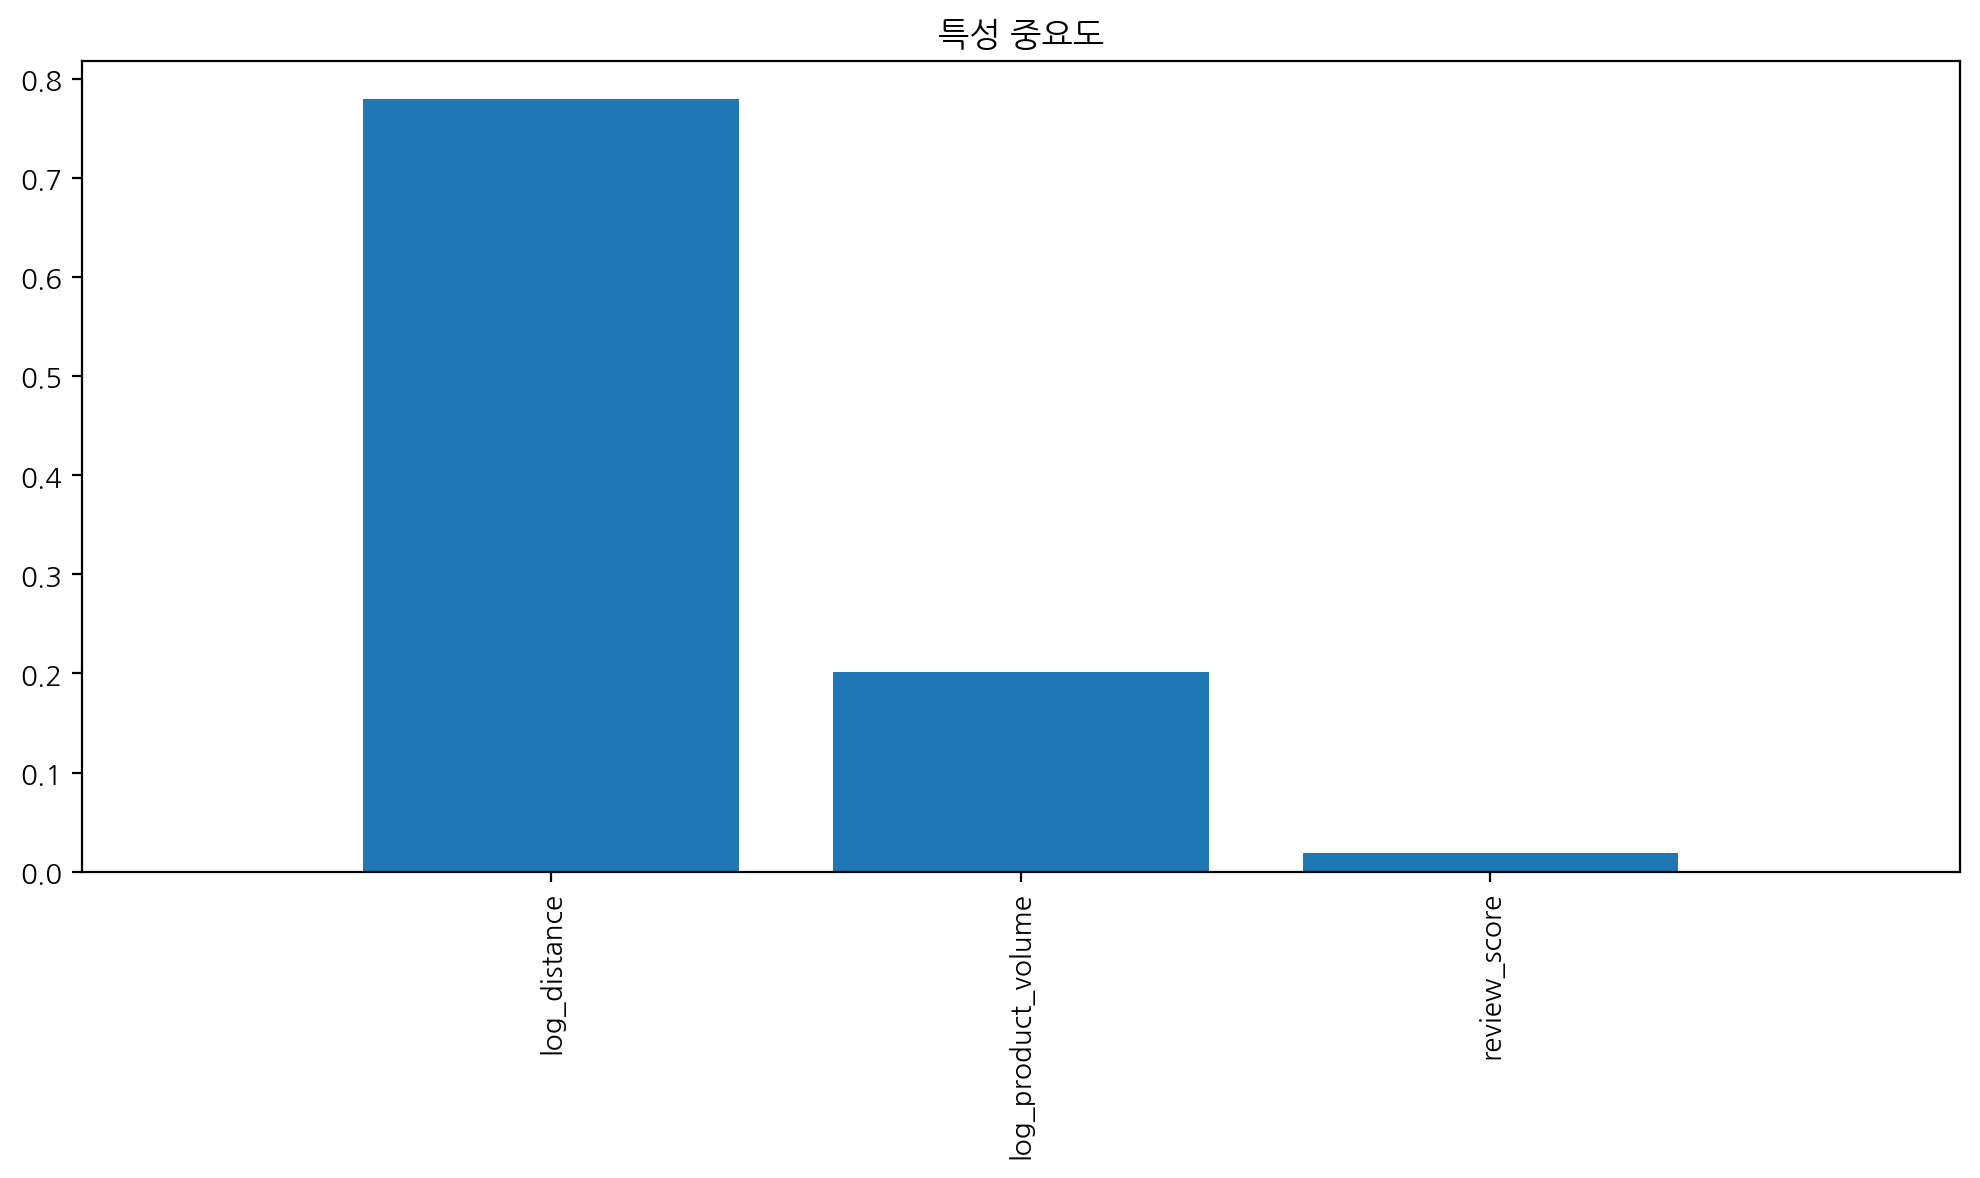

In [70]:
# 특성 중요도 계산
importances = rf_model.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 특성 중요도를 플롯
plt.figure(figsize=(10, 6))
plt.title("특성 중요도")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

## 앙상블 (gradientboosting, randomforest, lr)
- 앙상블에는 random_state 상관없음

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

- 개별 모델 검증세트로 과대적합 확인.

- Gradientboosting 최적 하이퍼파라미터

In [72]:
gb_model = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률
    'max_depth': [3, 5, 7]  # 트리의 최대 깊이
}

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

최적의 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [73]:
# 최적의 하이퍼파라미터를 설정한 후 모델 생성
gb_model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 200, random_state=42)

# 검증 세트를 사용하여 모델 평가
gb_model.fit(X_train, y_train)
y_pred_val = gb_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print("검증 세트 MSE:", mse_val)

# 테스트 세트를 사용하여 모델 평가
y_pred_test = gb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("테스트 세트 MSE:", mse_test)

검증 세트 MSE: 0.19817625798486596
테스트 세트 MSE: 0.196483987267858


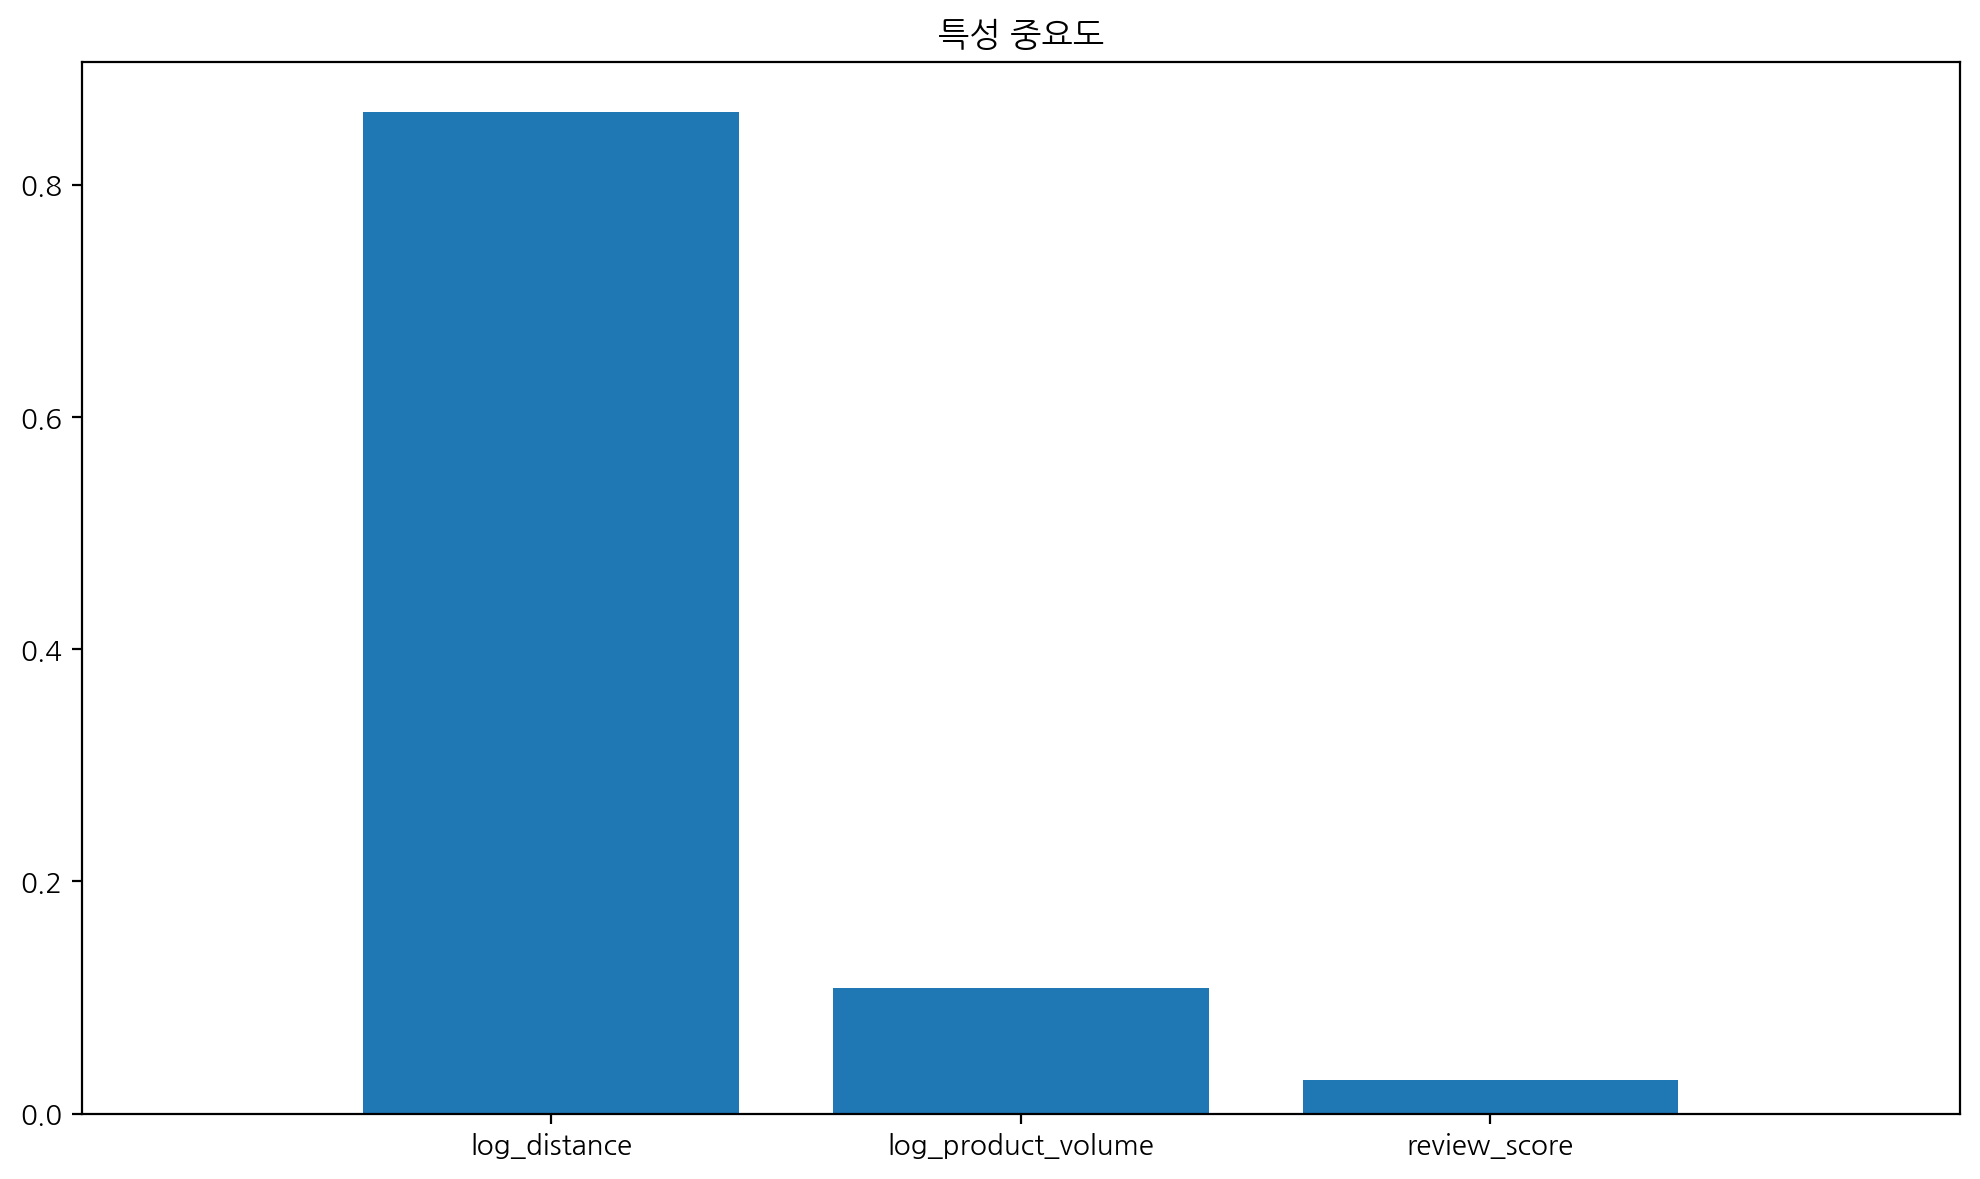

In [74]:
# 특성 중요도 계산
importances = gb_model.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 특성 중요도를 플롯
plt.figure(figsize=(10, 6))
plt.title("특성 중요도")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [75]:
# 최적의 하이퍼파라미터를 설정한 후 모델 생성
lr_model = LinearRegression()

# 검증 세트를 사용하여 모델 평가
lr_model.fit(X_train, y_train)
y_pred_val = lr_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print("검증 세트 MSE:", mse_val)

# 테스트 세트를 사용하여 모델 평가
y_pred_test = lr_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("테스트 세트 MSE:", mse_test)

검증 세트 MSE: 0.2111942112081179
테스트 세트 MSE: 0.21157689551287787


# 앙상블

- 교차 검증 mse는 cv에 따른 mse값의 평균

In [76]:
gb_regressor = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 200)
rf_regressor = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=10)
lr_model = LinearRegression()

ensemble_model = VotingRegressor([('gb', gb_regressor), ('rf', rf_regressor), ('lr', lr_model)])

ensemble_scores = cross_val_score(ensemble_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

ensemble_mse_scores = -ensemble_scores
print("앙상블 모델 교차 검증 MSE:", ensemble_mse_scores)
print("앙상블 모델 평균 MSE:", ensemble_mse_scores.mean())

앙상블 모델 교차 검증 MSE: [0.19877043 0.19666371 0.19817159 0.1987153  0.20311494 0.20025624
 0.20082349 0.20280473 0.20162114 0.19375986]
앙상블 모델 평균 MSE: 0.1994701431162004


## 학습 곡선 해석 단계 (x:데이터크기, y:모델성능지표)
- 1. 훈련 세트 크기에 따른 모델 성능 변화
- 2. 훈련세트와 검증세트의 성능 차이 확인, 차이가 크면 과대적합 의심
- 3. 훈련, 검증 모두 성능이 낮으면 과소적합, 훈련 높고, 검증 낮으면 과대적합
- 4. 데이터가 추가 될 수록 성능이 향상하는 지 확인
- 5. 하이퍼파라미터 조정할지 판단

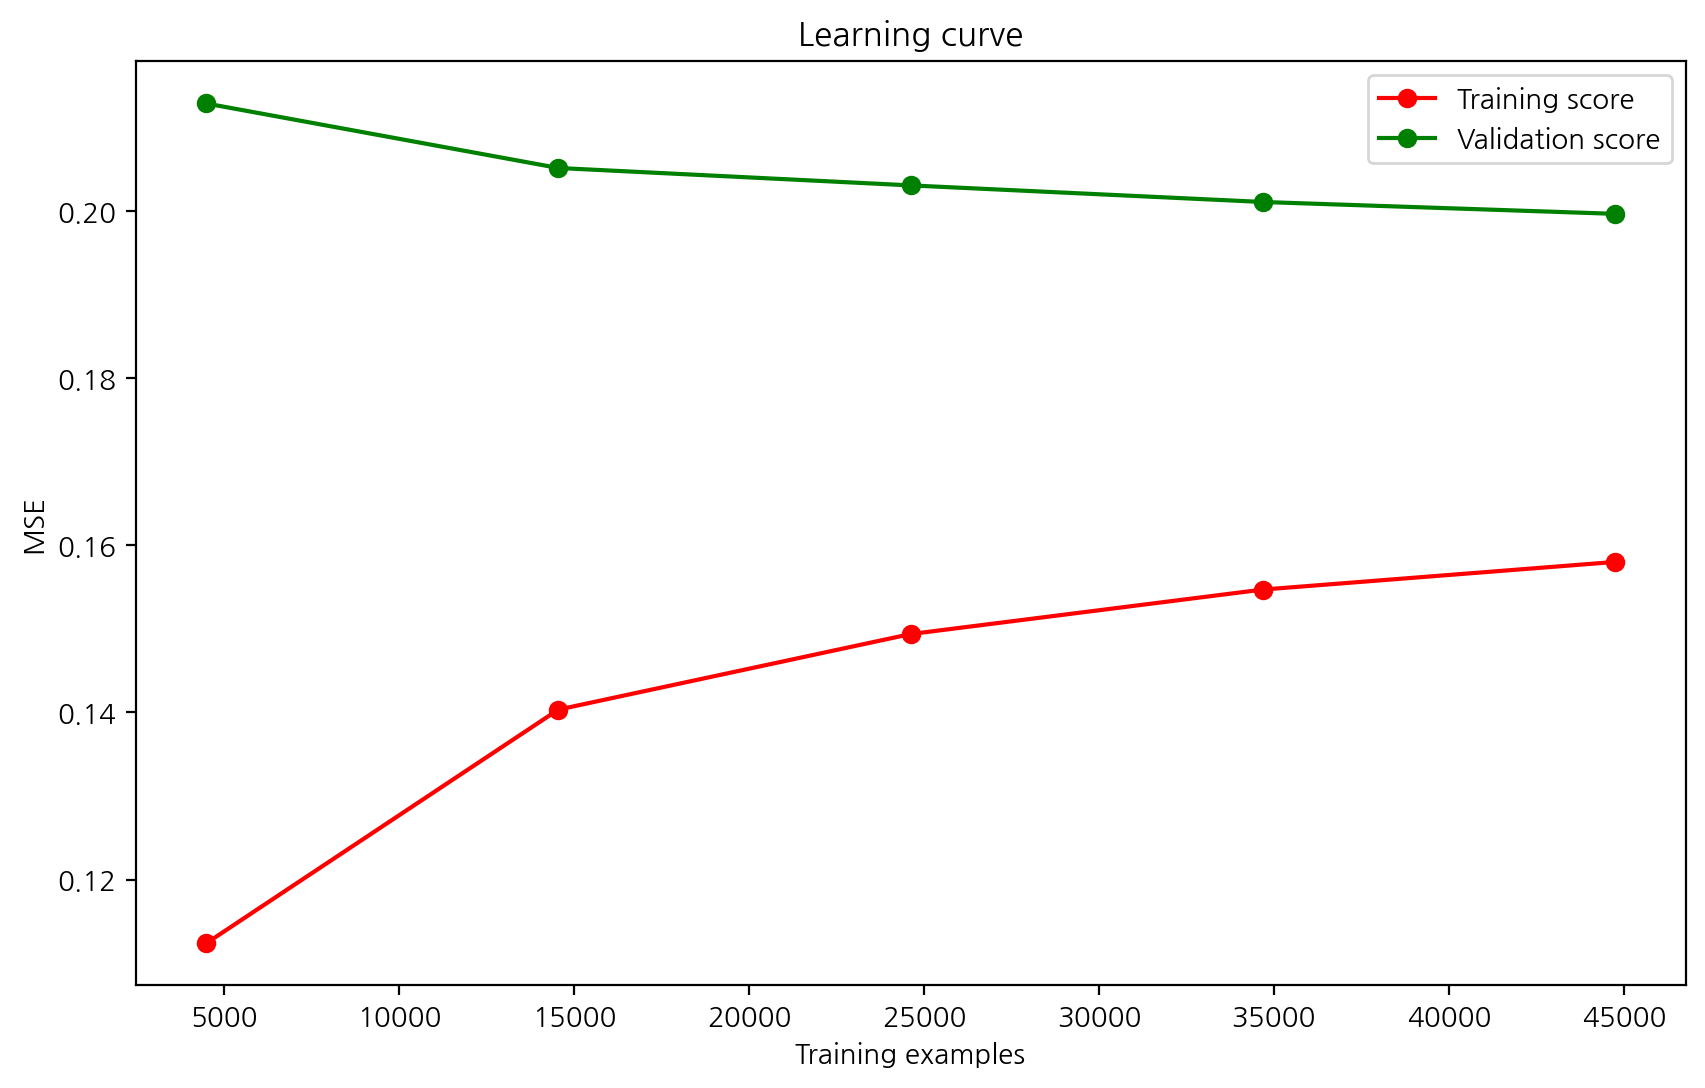

In [77]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(ensemble_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend(loc='best')
plt.show()

### 훈련 점수(training score):
- 훈련 세트의 크기가 5000일 때 훈련 점수는 0.05입니다. 이는 모델이 작은 훈련 세트에서 상대적으로 낮은 성능을 보이고 있다는 것을 나타냅니다.
- 훈련 세트의 크기가 증가함에 따라 훈련 점수는 조금씩 증가합니다. 이는 추가적인 데이터가 모델을 더 잘 학습하게 되어 훈련 점수가 조금씩 향상되고 있음을 나타냅니다. 하지만 훈련 점수가 크게 증가하지는 않습니다.
### 검증 점수(validation score):
- 작은 훈련 세트에서부터 검증 점수가 상당히 높은 것으로 나타납니다. 이는 모델이 작은 데이터셋에서는 일반화하기 어렵기 때문에 과적합(overfitting)이 발생하고 있음을 나타냅니다.
- 훈련 세트의 크기가 증가함에 따라 검증 점수가 조금씩 감소합니다. 이는 모델이 더 많은 데이터를 통해 학습되면서 일반화 능력이 향상되고 있음을 나타냅니다. 그러나 검증 점수의 변화가 크지 않으며, 훈련 점수와의 차이가 여전히 큽니다.
- 이러한 학습곡선을 통해 모델이 과적합되어 있고, 더 많은 데이터를 통해 일반화 능력을 향상시킬 수 있다는 것을 알 수 있습니다. 또한 훈련 점수와 검증 점수 간의 차이를 줄이는 것이 모델 성능을 향상시키는 데 중요하다는 것을 알려줍니다.

<br></br>

## 잔차 그래프 해석
- 1. 잔차의 분포 확인: 잔차가 정규분포에 가까우면 모델이 데이터 설명 잘함, 반대로 비대칭적이라면 잘못 예측했을 경우 
- 2. 잔차의 패턴 확인: 패턴을 읽지 못하는 경우가 있을 수도 있음
- 3. 잔차의 변동성 확인: 잔차가 일정하게 분포되어 있으면 모델이 일관된 예측을 하고 있을 가능성이 높음. 하지만 잔차의 분산이 크게 변동한다면 모델이 일관성이 없는 예측을 하고 있을 수 있습니다.
- 4. 이상치 식별: 잔차가 다른 데이터에 비해 크게 튀는 값들은 이상치의 가능성

### 교차 검증 잔차 그래프

In [78]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(ensemble_model, X_train, y_train, cv=10)

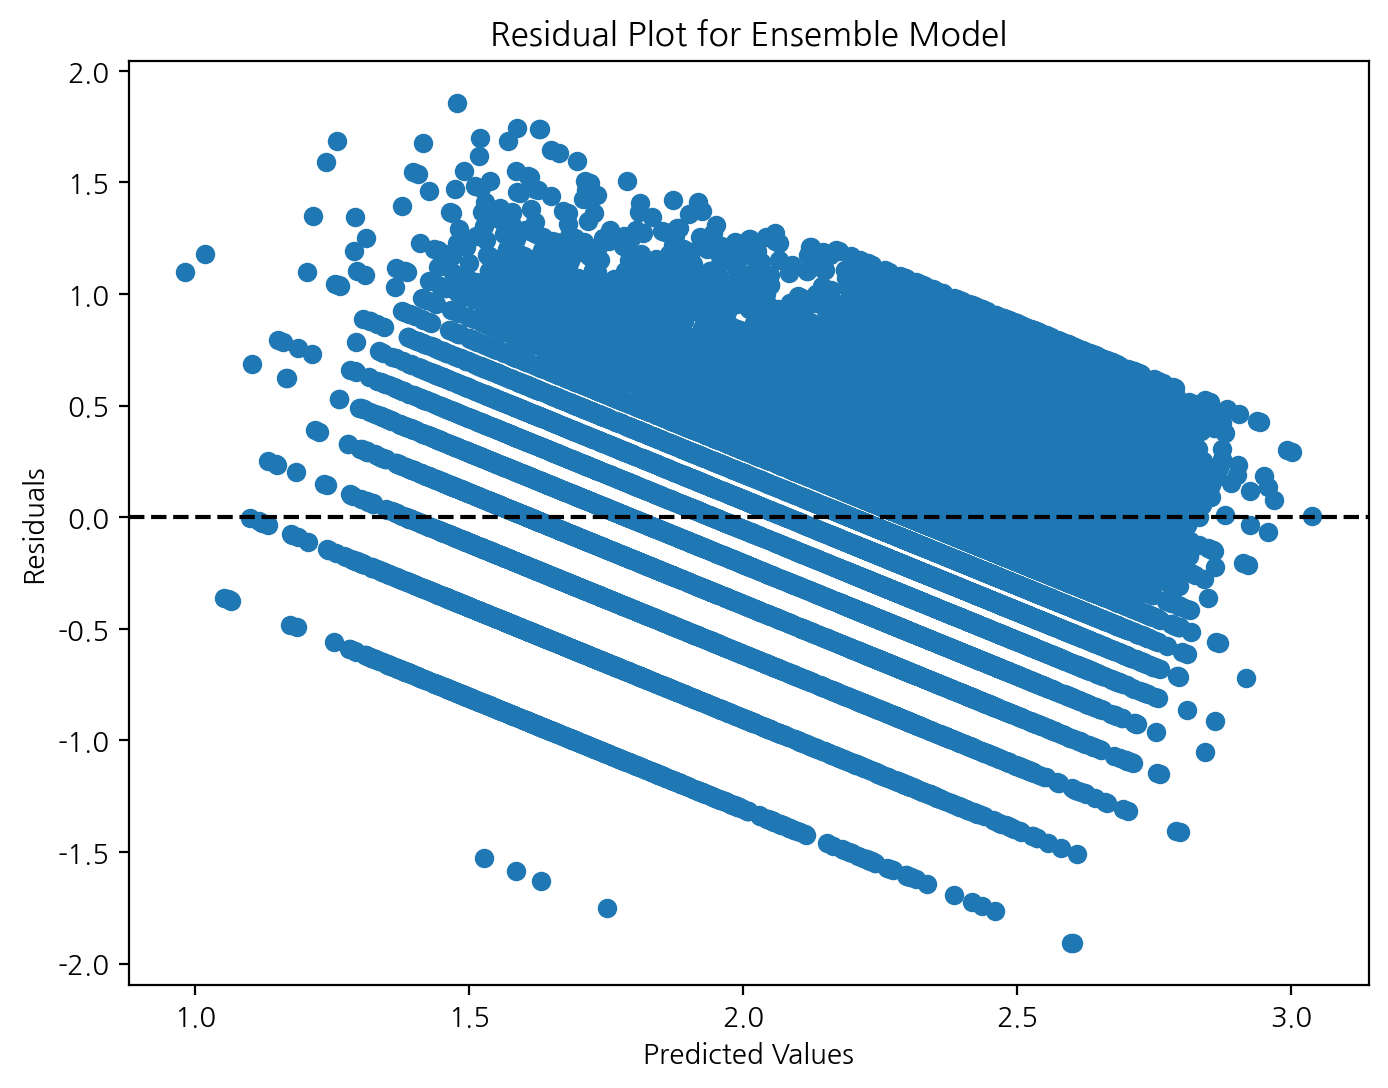

In [79]:
residuals = y_train - y_pred_cv

# 잔차 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cv, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ensemble Model')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()